In [ ]:
import os
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
arquivos = os.listdir()
arquivos=['artigo1_openAlex.csv',
 'artigo01_ResearchRabbit.xlsx',
 'artigo01_extracaoManual.csv',
 'Artigo01_Litmaps.csv',
 'artigo1_semantic_.csv',]

In [ ]:
dados = {}
for nome in arquivos:
    if nome.endswith('.bib'):
        continue

    if nome.endswith('.csv'):
            df = pd.read_csv(nome)
            dados[nome] = df
            #print(f"\nArquivo CSV lido: {nome}")
            #display(df.head())

    elif nome.endswith('.xlsx'):
            df = pd.read_excel(nome)
            dados[nome] = df
            #print(f"\nArquivo Excel lido: {nome}")
            #display(df.head())


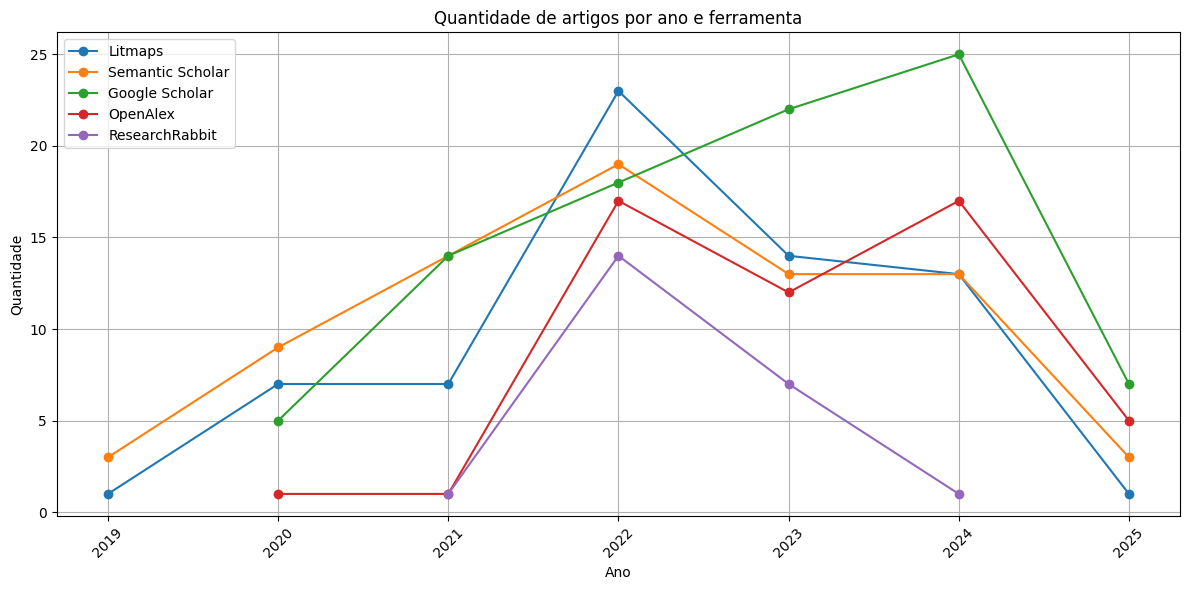

In [7]:
df_list = []
for nome_arquivo, df in dados.items():
    if df is None or not isinstance(df, pd.DataFrame):
        continue
    if "ResearchRabbit" in nome_arquivo:
        ferramenta = "ResearchRabbit"
    elif "litmaps" in nome_arquivo.lower():
        ferramenta = "Litmaps"
    elif "openalex" in nome_arquivo.lower():
        ferramenta = "OpenAlex"
    elif "semantic" in nome_arquivo.lower():
        ferramenta = "Semantic Scholar"
    else:
        ferramenta = "Google Scholar"

    df = df.copy()
    df['ferramenta'] = ferramenta

    # Normaliza o nome das colunas para facilitar (caso tenha diferenças)
    df.columns = [col.lower() for col in df.columns]

    # Tenta detectar o ano
    ano_col = None
    for col in df.columns:
        if 'ano' in col or 'year' in col:
            ano_col = col
            break

    if ano_col:
        df = df[[ano_col, 'ferramenta']].rename(columns={ano_col: 'ano'})
        df = df[df['ano'].notnull()]
        df['ano'] = df['ano'].astype(str).str.extract(r'(\d{4})')  # extrai o ano de forma segura
        df_list.append(df)
    else:
        print(f"Nenhuma coluna de ano encontrada no arquivo: {nome_arquivo}")

df_todos = pd.concat(df_list, ignore_index=True)
df_todos = df_todos.dropna()

# Agrupa os dados
df_grouped = df_todos.groupby(['ano', 'ferramenta']).size().reset_index(name='quantidade')

# Plota o gráfico
plt.figure(figsize=(12,6))
for ferramenta in df_grouped['ferramenta'].unique():
    df_sub = df_grouped[df_grouped['ferramenta'] == ferramenta]
    plt.plot(df_sub['ano'], df_sub['quantidade'], marker='o', label=ferramenta)

plt.title('Quantidade de artigos por ano e ferramenta')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


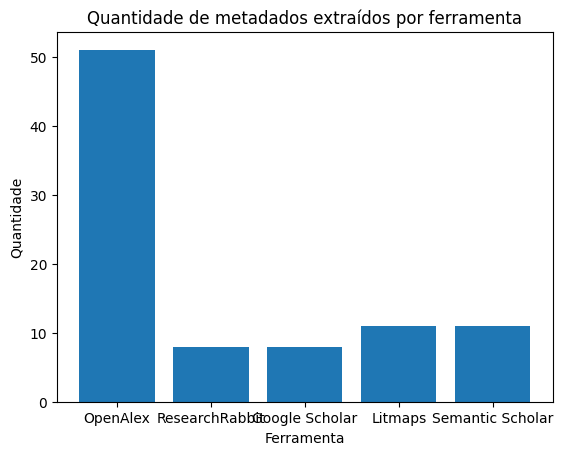

In [9]:
#quantidade de metadados por ferramenta
#import matplotlib.pyplot as plt

cobertura = {}

for nome_arquivo, df in dados.items():
    if df is None or not isinstance(df, pd.DataFrame):
        continue
    if "ResearchRabbit" in nome_arquivo:
        ferramenta = "ResearchRabbit"
    elif "litmaps" in nome_arquivo.lower():
        ferramenta = "Litmaps"
    elif "openalex" in nome_arquivo.lower():
        ferramenta = "OpenAlex"
    elif "semantic" in nome_arquivo.lower():
        ferramenta = "Semantic Scholar"
    else:
        ferramenta = "Google Scholar"

    cobertura[ferramenta] = cobertura.get(ferramenta, set()) | set(df.columns)

# Transforma em quantidade
cobertura_qtd = {f: len(cols) for f, cols in cobertura.items()}

# Plot
plt.bar(cobertura_qtd.keys(), cobertura_qtd.values())
plt.title("Quantidade de metadados extraídos por ferramenta")
plt.ylabel("Quantidade")
plt.xlabel("Ferramenta")
plt.show()


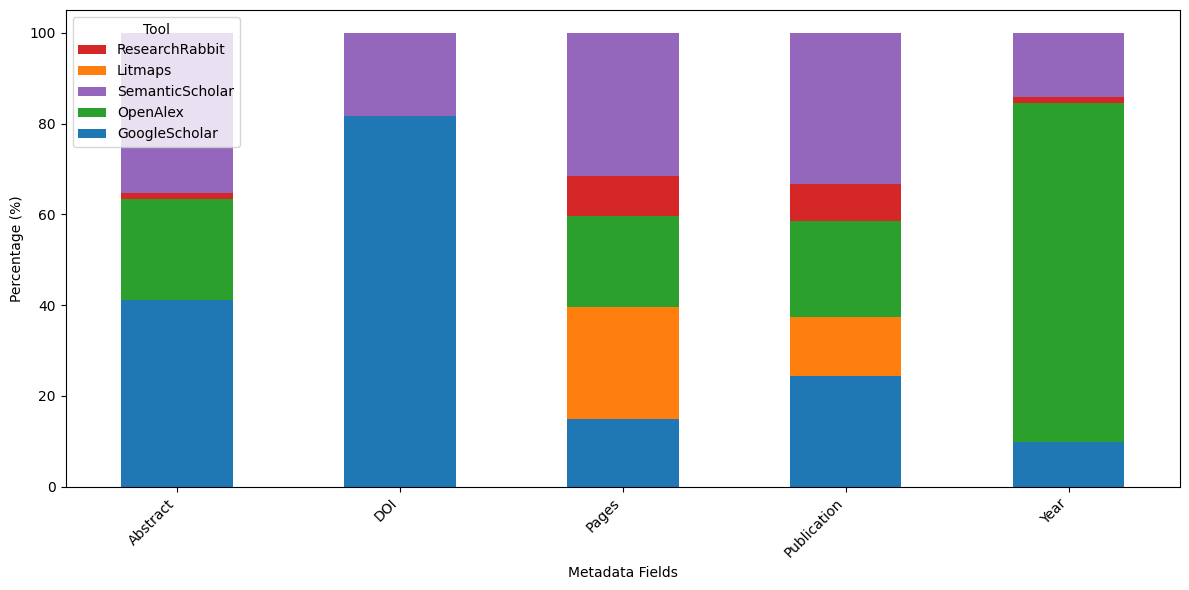

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

metadados_grupo = {
    'abstract': 'Abstract',
    'doi': 'DOI',
    'year': 'Year',
    'journal': 'Publication',     
    'publication': 'Publication', 
    'pages': 'Pages',
}

# Lista para armazenar os valores absolutos de nulos
lista_nulos = []

for nome_arquivo, df in dados.items():
    if df is None or not isinstance(df, pd.DataFrame):
        continue

    if "ResearchRabbit" in nome_arquivo:
        ferramenta = "ResearchRabbit"
    elif "litmaps" in nome_arquivo.lower():
        ferramenta = "Litmaps"
    elif "manual" in nome_arquivo.lower():
        ferramenta = "GoogleScholar"
    elif "openalex" in nome_arquivo.lower():
        ferramenta = "OpenAlex"
    elif "semantic_" in nome_arquivo.lower():
        ferramenta = "SemanticScholar"
    else:
        continue

    df_colunas = df.copy()
    df_colunas.columns = df_colunas.columns.str.lower()
    total = len(df_colunas)

    for original_col, metadado_unificado in metadados_grupo.items():
        if original_col in df_colunas.columns:
            nulos = df_colunas[original_col].isna().sum()
        else:
            nulos = total  
        lista_nulos.append({
            'Ferramenta': ferramenta,
            'Metadado': metadado_unificado,
            'Nulos': nulos
        })

df_nulos = pd.DataFrame(lista_nulos)
df_nulos = df_nulos.groupby(['Ferramenta', 'Metadado'], as_index=False).sum()
df_pivot = df_nulos.pivot(index='Metadado', columns='Ferramenta', values='Nulos').fillna(0)
df_percent = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100
ax = df_percent.plot(kind='bar', stacked=True, figsize=(12, 6))

ordem_desejada = ['ResearchRabbit','Litmaps', 'SemanticScholar' , 'OpenAlex','GoogleScholar' ]
handles, labels = ax.get_legend_handles_labels()
legenda_dict = dict(zip(labels, handles))
handles_ordenados = [legenda_dict[label] for label in ordem_desejada if label in legenda_dict]
plt.legend(handles=handles_ordenados, labels=ordem_desejada, title='Tool')
plt.ylabel('Percentage (%)')
plt.xlabel('Metadata Fields')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


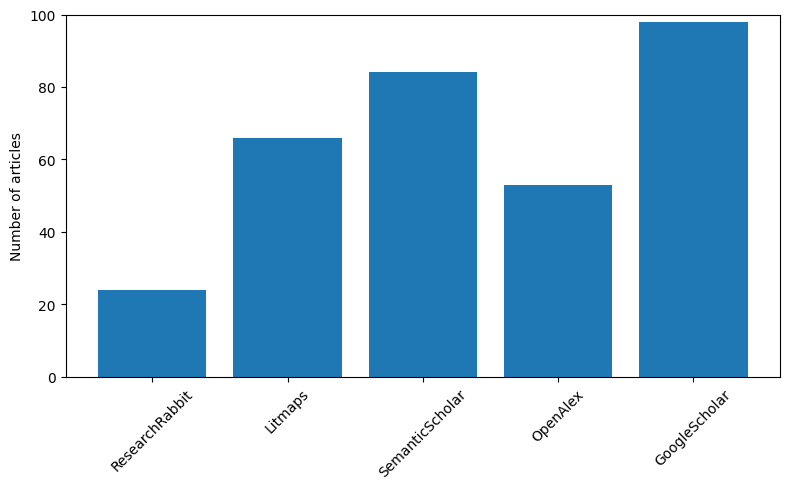

In [11]:

df = pd.DataFrame([
    {'Paper': 'Paper', 'ferramenta': 'ResearchRabbit', 'quantidade': 24},
    {'Paper': 'Paper', 'ferramenta': 'Litmaps', 'quantidade': 66},
    {'Paper': 'Paper', 'ferramenta': 'SemanticScholar', 'quantidade': 84},
    {'Paper': 'Paper', 'ferramenta': 'OpenAlex', 'quantidade': 53},
    {'Paper': 'Paper', 'ferramenta': 'GoogleScholar', 'quantidade': 98}

])

ferramentas = df['ferramenta']
valores = df['quantidade']

plt.figure(figsize=(8, 5))
plt.bar(ferramentas, valores)

plt.ylabel('Number of articles')
plt.xticks(rotation=45)
plt.ylim(0, max(valores) + 2)

plt.tight_layout()
plt.show()

